In [1]:
%pylab qt
%matplotlib inline

import datetime
from celestialbody import CelestialBody
import celestialbody
date = datetime.datetime(2021, 2, 28, 0, 0)

def mysavefig(name):
    plt.tight_layout()
    plt.savefig(name, bbox_inches="tight", dpi=200)

Populating the interactive namespace from numpy and matplotlib


In [2]:
body = CelestialBody("Earth")

In [4]:
body.trajectory()

(array([-0.96308675, -0.99598683, -0.97070781, -0.88939018, -0.75732487,
        -0.58251705, -0.37514546, -0.14696226,  0.08933277,  0.32072076,
         0.53448114,  0.71878957,  0.86328885,  0.95962282,  1.00191692,
         0.98718031,  0.91559627,  0.79066085,  0.6191294 ,  0.41073869,
         0.17769112, -0.06608448, -0.3058475 , -0.52705663, -0.71637865,
        -0.86259286, -0.95730514]),
 array([ 2.38628452e-01, -7.91907244e-04, -2.40193715e-01, -4.65757941e-01,
        -6.64776362e-01, -8.26307056e-01, -9.41679861e-01, -1.00485207e+00,
        -1.01262470e+00, -9.64733247e-01, -8.63825333e-01, -7.15333097e-01,
        -5.27242657e-01, -3.09757921e-01, -7.48537038e-02,  1.64285224e-01,
         3.93935580e-01,  6.00601147e-01,  7.71838407e-01,  8.97088186e-01,
         9.68441638e-01,  9.81259535e-01,  9.34567898e-01,  8.31173101e-01,
         6.77473370e-01,  4.82984202e-01,  2.59632987e-01]),
 array([-8.89435637e-06,  5.33540383e-06,  1.92978498e-05,  3.21884803e-05,
      

In [7]:
earth = CelestialBody("Earth")
earth.data("potential_energy_per_kilogram")

array([-1.33824703e+20, -1.33323721e+20, -1.32792936e+20, -1.32263811e+20,
       -1.31766269e+20, -1.31327169e+20, -1.30969201e+20, -1.30710177e+20,
       -1.30562604e+20, -1.30533468e+20, -1.30624135e+20, -1.30830338e+20,
       -1.31142228e+20, -1.31544528e+20, -1.32016844e+20, -1.32534227e+20,
       -1.33068076e+20, -1.33587456e+20, -1.34060851e+20, -1.34458289e+20,
       -1.34753675e+20, -1.34927052e+20, -1.34966481e+20, -1.34869224e+20,
       -1.34642020e+20, -1.34300409e+20, -1.33867216e+20])

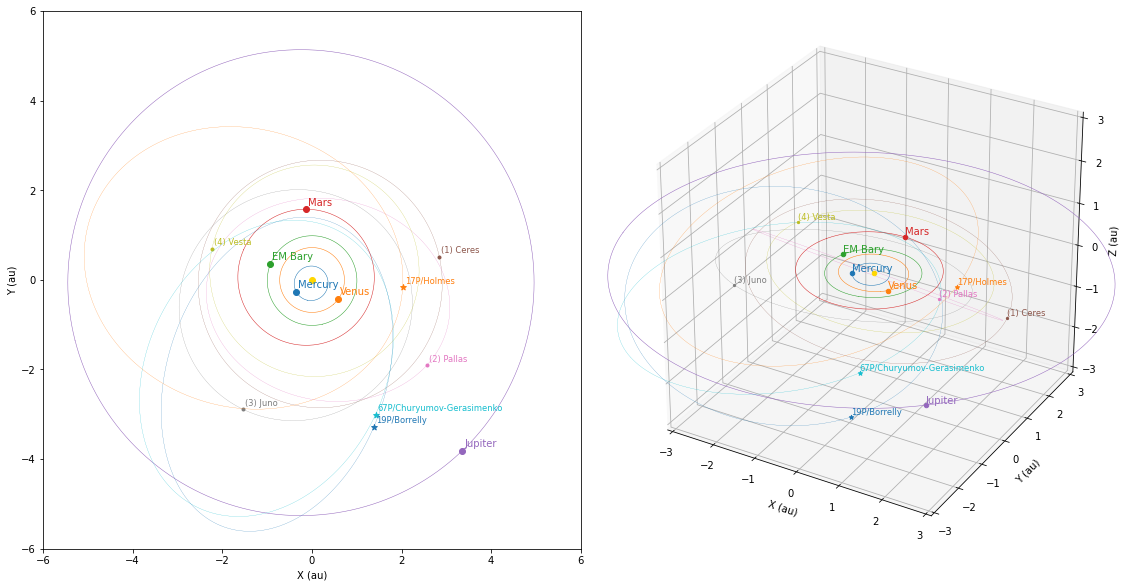

In [2]:
plt.figure(figsize=(16,8))
sps = (1,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax2 = plt.subplot2grid(sps, (0,1), projection='3d')

ax1.scatter(0,0, marker="o", color="gold", label="Soleil")
ax2.scatter(0,0,0, marker="o", color="gold", label="Soleil")

planets = ["Mercury", "Venus", "Earth", "Mars", "Jupiter"]
asteroids = ["Ceres", "Pallas", "Juno", "Vesta"]
comets = ["Churyumov-Gerasimenko", "Borrelly", "Holmes"]

names = planets+asteroids+comets
categories = ["planet" for planet in planets] + ["asteroid" for asteroid in asteroids] + ["comet" for comet in comets]
colormap = plt.cm.viridis
colorst = [colormap(i) for i in np.linspace(0, 1, len(names))]

for name, category, i in zip(names, categories, range(len(names))):
    body = CelestialBody(name, category=category)
    body.date = date
    x,y,z = body.position
    X,Y,Z = body.orbit
   
    color = "C"+str(i)
    if body.category == "planet":
        marker = "o"
        linewidth = .5
        alpha = 1
        fontsize = "medium"
    elif body.category == "asteroid":
        marker = "."
        linewidth = .2
        alpha = 1
        fontsize = "small"
    elif body.category == "comet":
        marker = "*"
        linewidth = .2
        alpha = 1
        fontsize = "small"
        
    ax1.scatter(x,y, marker=marker, color=color, label=body.fullname, alpha=alpha)
    ax1.plot(X,Y, color=color, linewidth=linewidth, alpha=alpha)
    ax1.annotate(body.fullname, (x,y), color=color, textcoords="offset points", xytext=(2,2),
                 fontsize=fontsize, horizontalalignment='left', verticalalignment='bottom', alpha=alpha)
    
    ax2.scatter(x,y,z, marker=marker, color=color, label=body.fullname, alpha=alpha)
    ax2.plot(X,Y,Z, color=color, linewidth=linewidth, alpha=alpha)
    ax2.text(x,y,z,  body.fullname, fontsize=fontsize,  color=color, horizontalalignment='left', verticalalignment='bottom', alpha=alpha)

# Gestion des limites, etc.

if True:
    a_lim = 6
    ax1.set_aspect("equal")
    ax1.set_xlim(-a_lim,a_lim)
    ax1.set_ylim(-a_lim,a_lim)

    ax2.set_xlim(-a_lim/2,a_lim/2)
    ax2.set_ylim(-a_lim/2,a_lim/2)
    ax2.set_zlim(-a_lim/2,a_lim/2)
    
    for ax in [ax1, ax2]:
        ax.set_xlabel("X (au)")
        ax.set_ylabel("Y (au)")
    ax2.set_zlabel("Z (au)")

    mysavefig("demo.png")

In [2]:
earth = CelestialBody("Earth")
start = datetime.datetime(2021,2,18)

In [1]:
%matplotlib inline

import display
import datetime

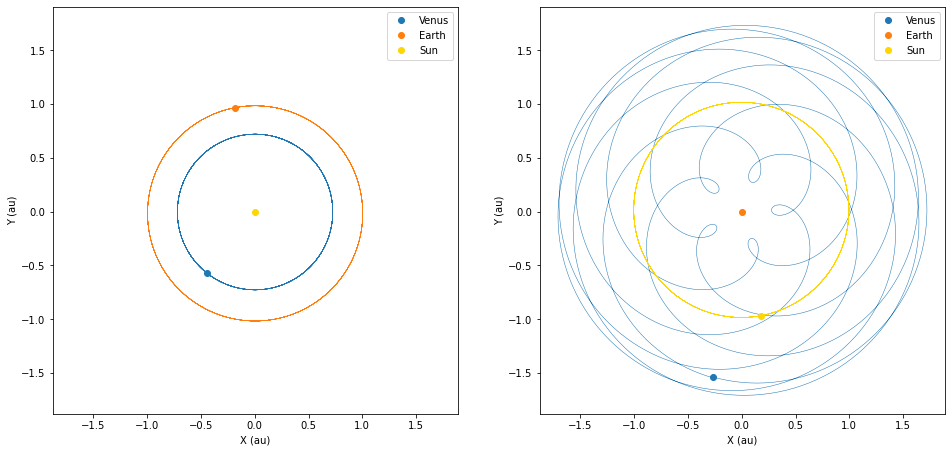

In [2]:
names = ["Venus", "Earth"]
fig = display.frame_of_reference(names, ref="Earth")